In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')

jobs = pd.read_csv('../data/salaries.csv')

In [107]:
key_words = ('Data','Machine Learning', 'Analyst', 'Analysis', 'Analytics','Bussiness Intelligence', 'AI', 'BI', 'Decision Scientist','Computer Vision', 'NLP', 'ML', 'Artificial Intelligence','Deep Learning', 'ETL')

jobs = jobs[jobs['job_title'].str.contains('|'.join(key_words))]


jobs = jobs[jobs['work_year'] != 2025]

jobs

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
4544,2024,MI,FT,Business Analyst,25860,USD,25860,IN,100,UA,M
14516,2024,EN,FT,Data Quality Specialist,16100,EUR,17888,PT,100,US,L
15836,2024,SE,FT,Data Developer,131958,USD,131958,US,0,US,M
15837,2024,SE,FT,Data Developer,79175,USD,79175,US,0,US,M
15840,2024,EN,FT,Analytics Engineer,720000,USD,720000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
88579,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
88580,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
88581,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
88582,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [108]:
company_sizes = pd.DataFrame(jobs.groupby(['work_year','company_size'])['salary_in_usd'].median())
company_sizes = company_sizes.reset_index()
company_sizes

company_sizes['company_size'][company_sizes['company_size'] == 'L'] = 'Grandes [ +250 p. ]'
company_sizes['company_size'][company_sizes['company_size'] == 'M'] = 'Medianas [ 50 - 250 p. ]'
company_sizes['company_size'][company_sizes['company_size'] == 'S'] = 'Pequeñas [ -50 p. ]'

company_sizes

,work_year,company_size,salary_in_usd
0,2020,Grandes [ +250 p. ],91000.0
1,2020,Medianas [ 50 - 250 p. ],96500.0
2,2020,Pequeñas [ -50 p. ],59651.5
3,2021,Grandes [ +250 p. ],91867.0
4,2021,Medianas [ 50 - 250 p. ],80000.0
5,2021,Pequeñas [ -50 p. ],81750.0
6,2022,Grandes [ +250 p. ],125976.0
7,2022,Medianas [ 50 - 250 p. ],135000.0
8,2022,Pequeñas [ -50 p. ],61252.0
9,2023,Grandes [ +250 p. ],105700.0


Text(0.5, 0, 'Años')

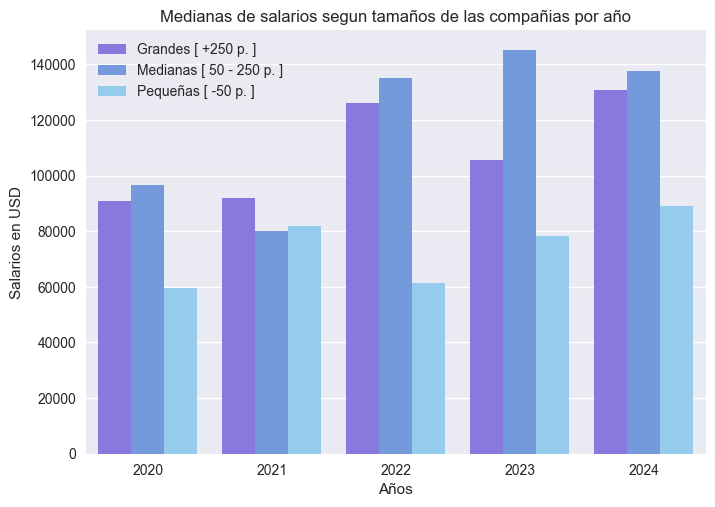

In [109]:
sns.barplot(data=company_sizes, x='work_year', y='salary_in_usd', hue='company_size', palette=['#7B68EE', '#6495ED', '#87CEFA'])

plt.legend()
plt.title('Medianas de salarios segun tamaños de las compañias por año')
plt.ylabel("Salarios en USD")
plt.xlabel('Años')

In [110]:
xp_sizes = pd.DataFrame(jobs[(jobs['work_year']==2024) & (jobs['experience_level'] != 'EX')].groupby(['experience_level','company_size'])['salary_in_usd'].median())
xp_sizes = xp_sizes.reset_index()
xp_sizes

xp_sizes['company_size'][xp_sizes['company_size'] == 'L'] = 'Grandes [ +250 p. ]'
xp_sizes['company_size'][xp_sizes['company_size'] == 'M'] = 'Medianas [ 50 - 250 p. ]'
xp_sizes['company_size'][xp_sizes['company_size'] == 'S'] = 'Pequeñas [ -50 p. ]'

xp_sizes

,experience_level,company_size,salary_in_usd
0,EN,Grandes [ +250 p. ],91200.0
1,EN,Medianas [ 50 - 250 p. ],86000.0
2,EN,Pequeñas [ -50 p. ],43500.0
3,MI,Grandes [ +250 p. ],127600.0
4,MI,Medianas [ 50 - 250 p. ],122100.0
5,MI,Pequeñas [ -50 p. ],70000.0
6,SE,Grandes [ +250 p. ],151300.0
7,SE,Medianas [ 50 - 250 p. ],157000.0
8,SE,Pequeñas [ -50 p. ],120000.0


Text(0.5, 0, 'Nivel de Experiencia')

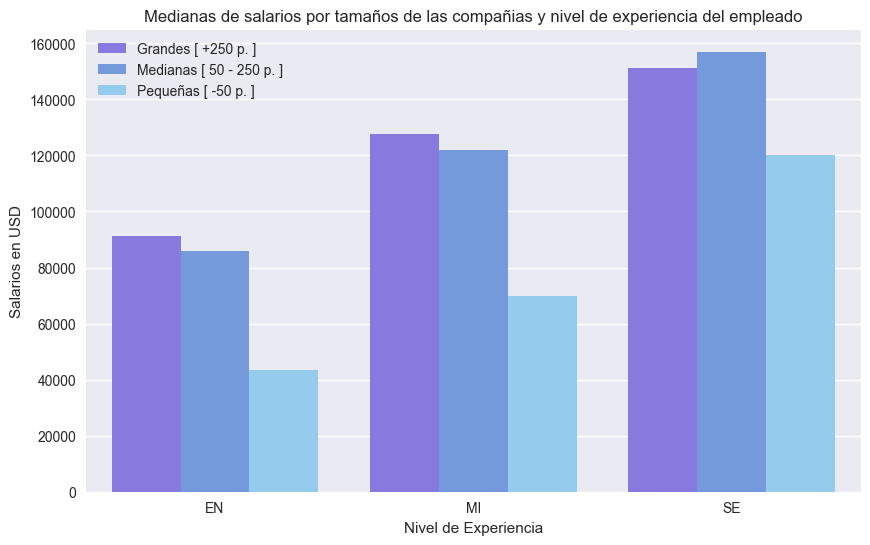

In [111]:
plt.figure(figsize=(10,6))
sns.barplot(data=xp_sizes, x='experience_level', y='salary_in_usd', hue='company_size', palette=['#7B68EE', '#6495ED', '#87CEFA'])

plt.legend()
plt.title('Medianas de salarios por tamaños de las compañias y nivel de experiencia del empleado')
plt.ylabel("Salarios en USD")
plt.xlabel('Nivel de Experiencia')